# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms

In [3]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

TODO:

Add Overfitting, Underfitting, train test split and cross-validation as necessary tools

## Regression

Como vimos, la idea de Regresion Lineal es modelar

$$y(x,w)=w_{0}+w_{1}x$$

De manera tal que 

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

Con alguna incerteza que no nos importa demasiado hoy.

Aca tenemos la gran ventaja de que sabemos la verdadera funcion que sigue el target. En la vida real, casi nunca sabemos la verdadera funcion.

In [78]:
N_SAMPLES = 20
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
t =  4 * x+ np.sin(x*6)+ 0.5*np.random.randn(N_SAMPLES,1)

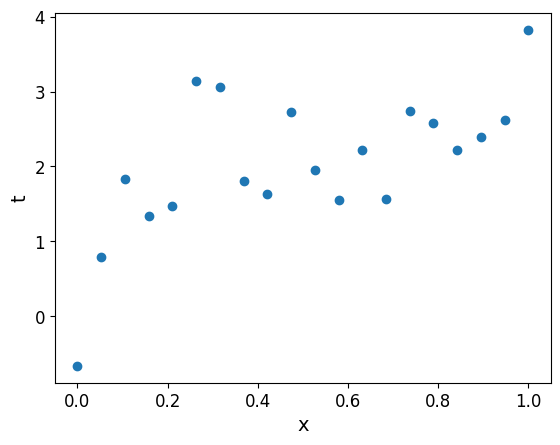

In [79]:
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [80]:
def y_true(x):
  return  4 * x+ np.sin(x*6)

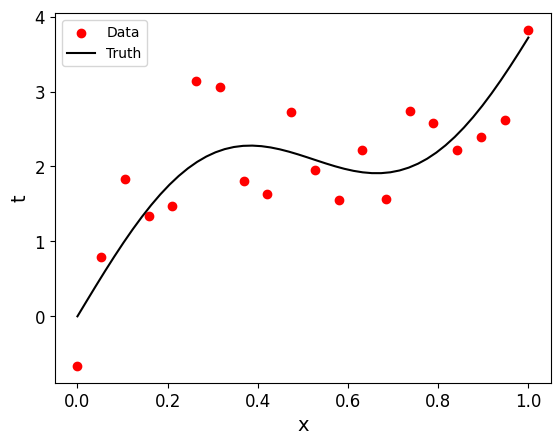

In [81]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

$$y(x_{i},\vec{w})=w_{0}1+w_{1}x_{i}$$

$$\phi_{0}(x)=1$$

$$\phi_{1}(x)=x$$

$$y(x_{i},\vec{w})=w_{0}\phi_{0}(x_{i})+w_{1}\phi_{1}(x_{i})$$

$$y(x_{i},\vec{w})=\vec{w}^{T}\cdot\vec{\phi}(x_{i})$$

$$\vec{w}^{T}=(w_{0},w_{1})$$

$$\vec{\phi}^{T}(x_{i})=(\phi_{0}(x_{i}),\phi_{1}(x_{i}))$$

$$y^{T}=(y_{1},y_{2},...,y_{N})$$

$$y=\Phi\cdot\vec{w}$$

Si queremos obtener los estimador de maxima verosimilitud de los pesos $w_{0}$, $w_{1}$, tenemos que resolver las ecuaciones normales

$$w_{ML}=(\Phi^{T}\Phi)^{-1}\Phi^{T}t$$

Donde $w_{ML}=(w_{0,ML},w_{1,ML})^{T}$, $t$ el vector de target y $\Phi$ es la matriz de diseño. En cada columna, tiene una de las funciones de base. En este caso, 1 y x. En cada fila, tiene una medicion

Si tenemos M funciones de base y N mediciones, 

$w_{ML}$ es una matriz de $M \text{ x } 1 $

$\Phi$ es una matriz de $N \text{ x } M$

$t$ es una matriz de $N \text{ x } 1$ 

In [82]:
Phi=np.vstack([np.ones(len(x)),x[:,0]]).T # agrupo 1s y xs para cada medicion
print(Phi.shape)

(20, 2)


Las ecuaciones normales tienen una inversa ahi metida. Eso no es numericamente muy deseable. Conviene resolver la ecuacion

$$(\Phi^{T}\Phi)w_{ML}=\Phi^{T}t$$

y utilizar `np.linalg.solve(A,b)` que obtiene el vector $X$ solucion de la ecuacion

$$Ax=b$$



In [83]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

Veamos la solucion

In [84]:
wML

array([[1.07467384],
       [1.93169139]])

Podemos graficar esta solucion facilmente

In [85]:
def y_ML(x,wML):
  return wML[0]+wML[1]*x

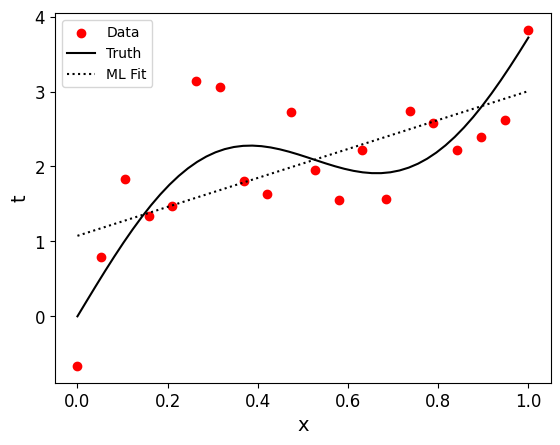

In [86]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Obviamente, no funciona muy bien... Pero hay que cuantificarlo!

In [87]:
def rmse(t,y):
    return np.sqrt(np.mean((t-y)**2))

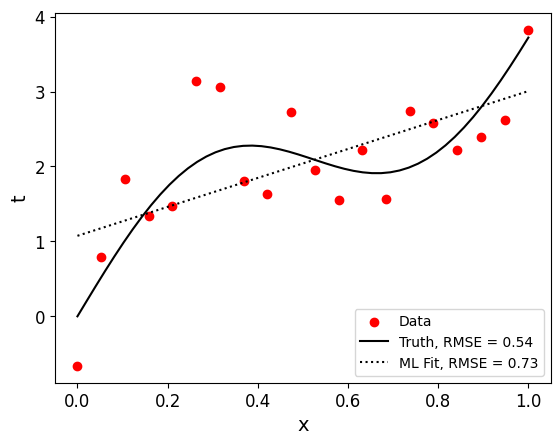

In [88]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Text(0.5, 1.0, 'Residuals')

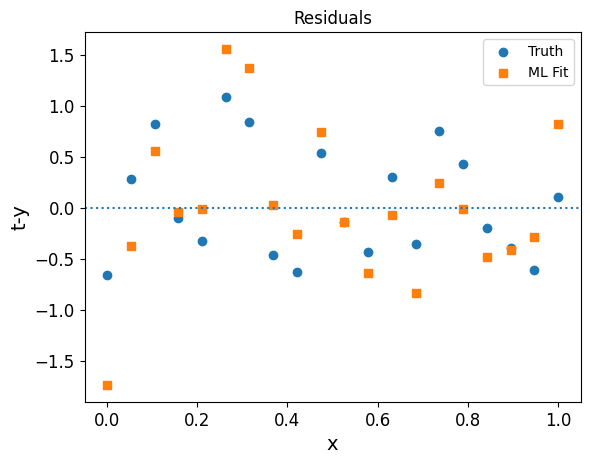

In [89]:
plt.scatter(x,t-y_true(x),marker='o',label='Truth')
plt.scatter(x,t-y_ML(x,wML),marker='s',label='ML Fit')
plt.axhline(0.0,linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('t-y')
plt.title('Residuals')

### Ejercicio

Resuelvan las ecuaciones normales, pero ahora modelando la funcion como

$$y(x_{i},w)=w_{0}+\sum_{d=1}^{5}w_{d}x^{d}_{i}$$

In [90]:
Phi=np.vstack([np.ones(len(x)),x[:,0],x[:,0]**2,x[:,0]**3,x[:,0]**4,x[:,0]**5]).T#[1.0 x x2 x3 x4 x5]

In [91]:
Phi.shape

(20, 6)

In [92]:
print(x[0],Phi[0])

[0.] [1. 0. 0. 0. 0. 0.]


In [93]:
Phi=np.asarray([x[:,0]**m for m in range(6)]).T

In [94]:
Phi.shape

(20, 6)

In [171]:
A=np.dot(Phi.T,Phi)
b=np.dot(Phi.T,t)
wML=np.linalg.solve(A,b)

ValueError: shapes (6,20) and (10,1) not aligned: 20 (dim 1) != 10 (dim 0)

In [172]:
wML

array([[  -0.60886976],
       [  29.77638554],
       [-113.62932384],
       [ 202.85524885],
       [-177.20420074],
       [  62.38560572]])

In [97]:
def y_ML(x,wML):
  return wML[0]*(x**0)+wML[1]*x+wML[2]*(x**2)+wML[3]*(x**3)+wML[4]*(x**4)+wML[5]*(x**5) 

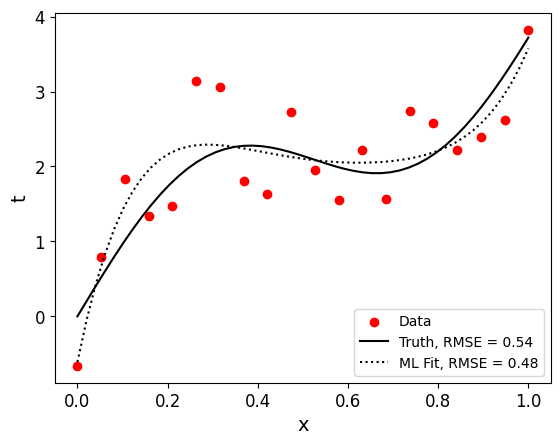

In [98]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x,t, c='red', label='Data')
plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t,y_true(x)),2)))
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t,y_ML(x,wML)),2)))
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

### Under and Overfitting

In [149]:
N_SAMPLES = 10
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2*np.pi*x) + np.random.randn(N_SAMPLES, 1) * 0.3

In [150]:
def y_true(x):
    return np.sin(2*np.pi*x)

Always evaluate on testing

In [151]:
N_SAMPLES_TEST = 10
x_test = np.random.rand(N_SAMPLES_TEST, 1)
t_test = np.sin(2*np.pi*x_test)+ 0.3*np.random.randn(N_SAMPLES_TEST,1)

Let's define a simple class that trains and evaluates a model for a given degree

In [195]:
class LinearModelDegree():
    def __init__(self,degree):
        self.degree = degree
        self.wML = np.zeros(degree+1)

    def fit(self,x,t):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        A=np.dot(Phi.T,Phi)
        b=np.dot(Phi.T,t)
        self.wML=np.linalg.solve(A,b)
        return self

    def y_ML(self,x):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        return np.dot(Phi,self.wML)

    def Phi(self,x):
        Phi = np.array([x[:,0]**i for i in range(self.degree+1)]).T
        return Phi
    

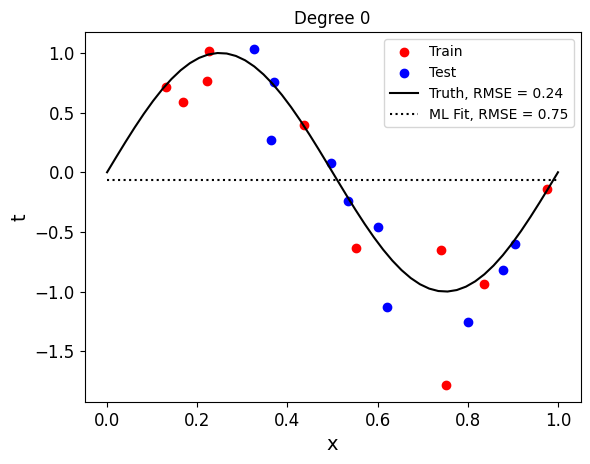

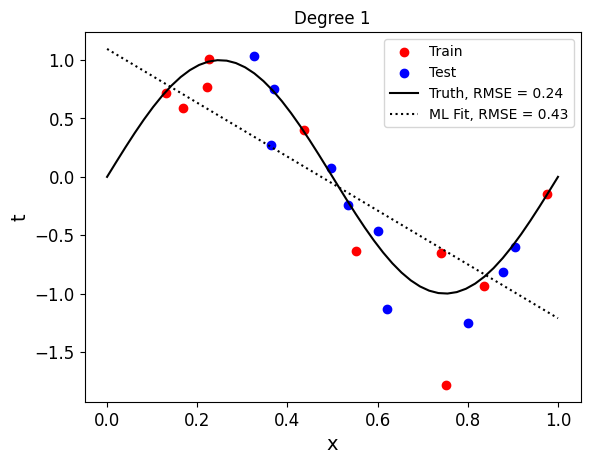

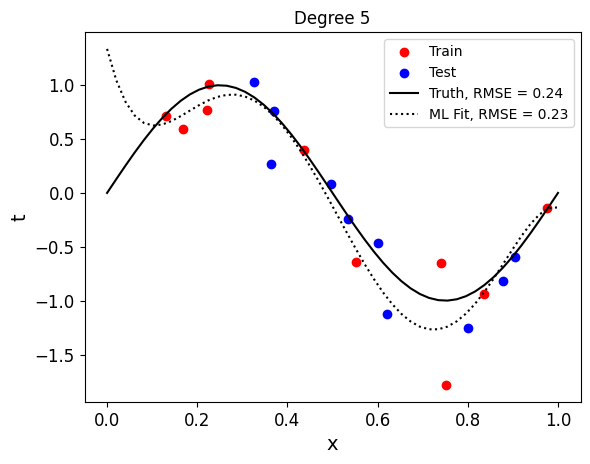

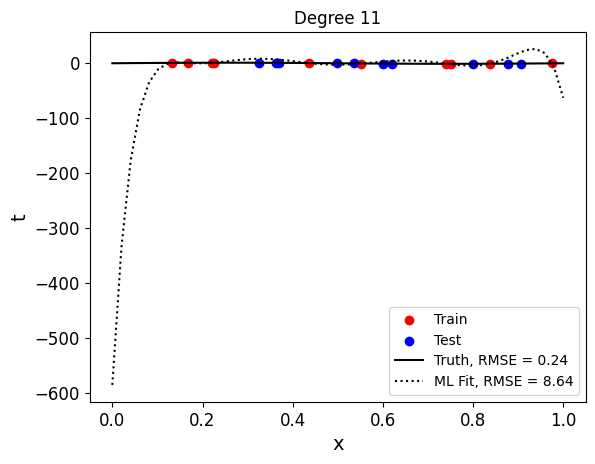

In [186]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
for degree in [0,1,5,11]:#range(6):
    plt.scatter(x,t, c='red', label='Train')
    plt.scatter(x_test,t_test, c='blue', label='Test')
    model = LinearModelDegree(degree)
    model.fit(x,t)
    plt.plot(xvals,y_true(xvals),color='black',label='Truth, RMSE = '+str(np.round(rmse(t_test,y_true(x_test)),2)))
    plt.plot(xvals,model.y_ML(xvals),color='black',linestyle='dotted',label='ML Fit, RMSE = '+str(np.round(rmse(t_test,model.y_ML(x_test)),2)))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Degree %i' % degree)
    plt.show()

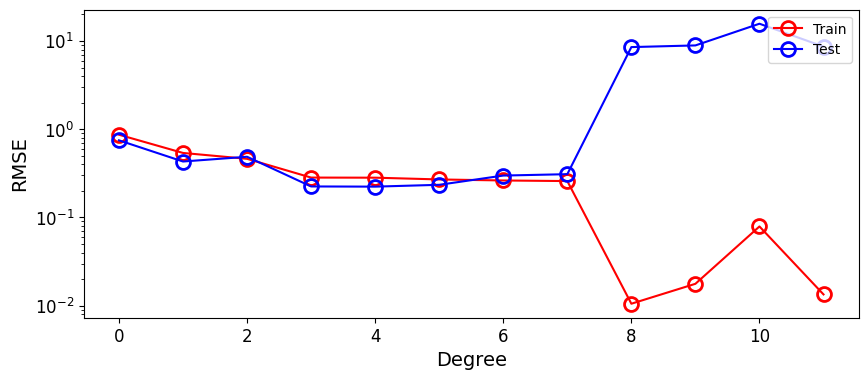

In [187]:
max_degree = 11
rmse_vals = np.zeros(max_degree+1)
rmse_vals_test = np.zeros(max_degree+1)
for ndegree, degree in enumerate(range(max_degree+1)):
    model = LinearModelDegree(degree)
    model.fit(x,t)
    rmse_vals[ndegree] = rmse(t,model.y_ML(x))
    rmse_vals_test[ndegree] = rmse(t_test,model.y_ML(x_test))

plt.figure(figsize=(10,4))
plt.plot(range(max_degree+1), rmse_vals, 'o-r', mfc='None', ms=10, mew=2, label='Train')
plt.plot(range(max_degree+1), rmse_vals_test, 'o-b', mfc='None', ms=10, mew=2,label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

### Validation and cross-validation

Validation test

In [188]:
x_train, x_val = x[:8], x[8:]
t_train, t_val = t[:8], t[8:]

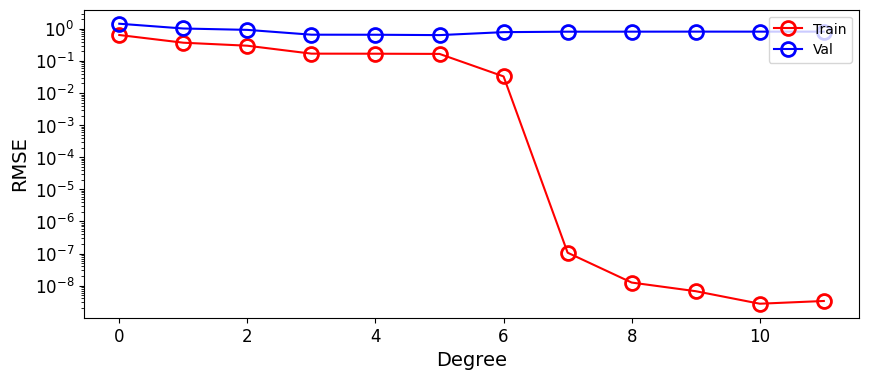

In [189]:
max_degree = 11
rmse_vals = np.zeros(max_degree+1)
rmse_vals_val = np.zeros(max_degree+1)
for ndegree, degree in enumerate(range(max_degree+1)):
    model = LinearModelDegree(degree)
    model.fit(x_train,t_train)
    rmse_vals[ndegree] = rmse(t_train,model.y_ML(x_train))
    rmse_vals_val[ndegree] = rmse(t_val,model.y_ML(x_val))

plt.figure(figsize=(10,4))
plt.plot(range(max_degree+1), rmse_vals, 'o-r', mfc='None', ms=10, mew=2, label='Train')
plt.plot(range(max_degree+1), rmse_vals_val, 'o-b', mfc='None', ms=10, mew=2,label='Val')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

But too few samples! Cross-validation

In [190]:
np.vstack([x[:1],x[2:]]).shape

(9, 1)

In [191]:
rmse_vals_val_kfold = np.zeros((N_SAMPLES,max_degree+1))
for nsample in range(N_SAMPLES):
    for ndegree, degree in enumerate(range(max_degree+1)):
        x_train, t_train = np.vstack([x[:nsample],x[nsample+1:]]), np.vstack([t[:nsample],t[nsample+1:]])
        # print(x_train.shape,t_train.shape)
        x_val, t_val = x[nsample].reshape(-1,1), t[nsample].reshape(-1,1)
        model = LinearModelDegree(degree)
        model.fit(x_train,t_train)
        rmse_vals_val_kfold[nsample,ndegree] = rmse(t_val,model.y_ML(x_val))


In [192]:
np.mean(rmse_vals_val_kfold,0)

array([  0.84907926,   0.50054336,   0.61419867,   0.39440509,
         0.53510122,   0.5955539 ,   2.84059925,  46.11852898,
        11.18696604,  62.87104796, 139.40582001,  71.8398949 ])

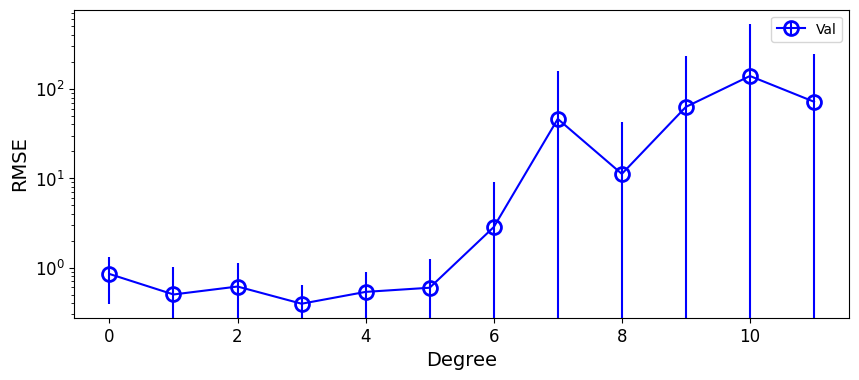

In [193]:
plt.figure(figsize=(10,4))
plt.errorbar(x=range(max_degree+1), y=np.mean(rmse_vals_val_kfold,0),yerr=np.std(rmse_vals_val_kfold,0), fmt='o-b', mfc='None', ms=10, mew=2,label='Val')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.yscale('log')
plt.legend(loc='upper right')

In [194]:
best_degree = np.argmin(np.mean(rmse_vals_val_kfold,0))
best_model = LinearModelDegree(int(best_degree))
best_model.fit(x,t)
print(best_model.wML)

[[ -0.66303304]
 [ 14.52303294]
 [-40.25626862]
 [ 26.61179845]]


### `sklearn` 

`sklearn.LinearRegression`
`sklearn.preprocessing.Pipeline`
`sklearn.model_evaluation.cross_val_score`
`GridSearchCV`, `RandomizedSearchCV`

### Bayesian Linear Regression

Hasta ahora, nuestro razonamiento fue el siguiente:

- Para cada medicion $n=1,...,N$, tenemos un target $t_{n}$ y $D$ features que agrupamos en $x_{n}$. 
- Modelamos nuestro problema con un modelo lineal $y$ tal que

$$y=\sum_{i=0}^{M}w_{j}\phi_{j}(\vec{x})=\vec{w}^{T}\vec{\phi}$$

con $\phi_{0}(\vec{x})=1$ y $\vec{w}$  el vector de **parametros** de nuestro modelo. Con este modelo, asumimos la verosimilitud

$$p(t|\vec{x},\vec{w},\beta)=\mathcal{N}(y(\vec{w},\vec{x}),\beta^{-1})$$

- Obtenemos el estimador de Maxima Verosimilitud (ML en ingles) $\vec{w}_{ML}$ resolviendo las ecuaciones normales.

$$
\vec{w}_\mathrm{ML} = (\Phi^{T}\cdot\Phi)^{-1}\cdot\Phi^{T}\cdot t
$$

$$
\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^N\left\{y(x_n, \vec{w}_{ML}) - t_n\right\}^2\;\;,
$$

donde $\Phi$ es la *matriz de diseño*, cuya fila $n$-ésima es simplemente $\vec{\phi}(x_n)$.


**Prior for $\vec{w}$**

Asumamos $\beta$ conocido y consideremos ahora a los $\vec{w}$ como variables aleatorias. Como tal, podemos considerar un prior previo a las mediciones

$$p(\vec{w}|\gamma)$$

donde $\gamma$ son los parametros del prior. Es uno de los **hiperparametros** del modelo.

Dado que la verosimilitud es una normal, podemos utilizar la prior conjugada: [otra normal](https://knowyourmeme.com/photos/1578199-emperor-palpatine-ironic).

$$p(\vec{w}|\gamma)=\mathcal{N}(\vec{w}|0,\gamma^{-1}\mathbf{I}_{(M+1)\mathrm{x}(M+1)})$$

Donde $\gamma$ es un unico numero que controla la precision de los parametros. 
Dado que tenemos $M+1$ parametros (ya que incluimos el sesgo $w_{0}$):

$$p(\vec{w}|\gamma)=\left(\frac{\gamma}{2\pi}\right)^{(M+1)/2} \exp{\left\{-\frac{\gamma}{2}\vec{w}^T\vec{w}\right\}}$$

**Maximum a Posterior (MAP)**

Para encontrar la distribución posterior de los parámetros, usamos el teorema de Bayes.

$$
p(\vec{w} | t, \beta, \gamma) = \frac{p(t | \vec{w}, \beta, \gamma)\,p(\vec{w} | \gamma)}{p(t | \beta, \gamma)}\;\;,
$$ 

donde escribí de forma explícita todos los elementos condicionales salvo $x$ y los hiperparámetros $\beta$ y $\gamma$). 

Antes de ir a la posterior, podemos sacar el MAP. Como su nombre lo indica, es encontrar el vector $\vec{w}_{MAP}$ que maximiza la posterior. Dado que incorpora la informacion del prior, es menos propenso al sobreajuste que el $\vec{w}_{ML}$. Dado que el numerador es una constante con respecto a $\vec{w}$, podemos obviarlo para buscar la maximización de la posterior.

Entonces, tenemos

$$p(\vec{w} | t, \beta, \gamma) \propto p(t | \vec{w}, \beta, \gamma)\,p(\vec{w} | \gamma)$$ 

Podemos hacer esto numericamente o aprovechar que utilizamos un prior conjugado que nos permite encontrar soluciones analiticas. Nuevamente, conviene considerar el logaritmo de la posterior

$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = \text{Ln }p(t|\vec{w},\beta,\gamma) + \text{Ln }p(\vec{w}|\gamma) +\text{ cte} $$

$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = -\frac{\beta}{2}\sum_{n=1}^N \left\{t_n - \vec{w}^{T}\vec{\phi}(x_n)\right\}^2 - \frac{\gamma}{2}\vec{w}^{T}\vec{w} +\text{ cte} $$

El ojo avispado puede darse cuenta de que esta funcion a maximizar es la que consideramos cuando vimos regresion RIDGE identificando $\frac{\gamma}{\beta}=\lambda$

Maximizando este posterior, tenemos que

$$
\vec{w}_\mathrm{MAP} = \left(\frac{\gamma}{\beta}\mathrm{\mathbf{I}} + \Phi^{T} \cdot\Phi\right)^{-1}\cdot \Phi^{T}\cdot t
$$

y en efecto $\frac{\gamma}{\beta}$ controla el peso relativo entre prior y verosimilitud. Si vamos al limite $\gamma \rightarrow 0$ vemos que $\vec{w}_{MAP}\rightarrow\vec{w}_{ML}$. Esto se explica muy facilmente: en ese limite el prior se vuelve uniforme y no agrega informacion a los datos, por lo que MAP y ML son equivalentes.

Con otras elecciones de prior, podemos llegar a Lasso u otro tipo de regularizaciones (ver ec. 3.56 del [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)).

In [196]:
beta = 1/0.3
gamma = 1e-2 / 0.3 # gamma/beta = lambda 
M = 8

model = LinearModelDegree(M)

Phi_train=model.Phi(x_train)
Phi_test=model.Phi(x_test)

Ejercicio:

Resolvamos las ecuaciones normales:

#### Posterior distribution

Ahora si obtengamos el posterior. La ventaja de utilizar priors conjugados es que sabemos la forma de la posterior

$$p(\vec{w}|t,\gamma,\beta)=\mathcal{N}(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$$

Con un poco de analisis podemos ver que para nuestro prior obtenemos que:

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \beta\;\mathbf{S}_N \cdot \Phi^{T}\cdot t\\
\mathbf{S}^{-1}_N &=& \gamma\;\mathbf{I} + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

Noten que si metemos el resultado de $\mathbf{S}_N$ en al ecuación de la media, recuperamos la ecuación de arriba para $\vec{w}_\mathrm{MAP}$. Esto sucede porque, como la normal es simétrica, el valor que maximiza la posterior es también el valor medio de la distribucion.

Si tomamos un prior más general (pero siempre normal):

$$
p(\vec{w} | \vec{\mu}_0, \mathbf{S}_0) = \mathcal{N}(\vec{w} | \vec{\mu}_0, \mathbf{S}_0)\;\;,
$$

donde ahora la matiz de covarianza es general. Entre otras cosas, esto permite acomodar constantes de regularización diferentes para cada parámetro. Además, podemos pensar en una matriz no diagonal, mucho más flexible. 

En este caso el valor medio y matriz de precisión de la posterior es:

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{S}^{-1}_N &=& \mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

Con esto, tenemos una descripción completa de la distribución del vector de parámetros $\vec{w}^{T} = (w_0, \ldots, w_M)$. 

#### Ejercicio: Fitteando una recta ruidosa de manera Bayesiana.

Tratemos de fittear los parametros $a_{0}$, $a_{1}$ de una recta $f(x,\vec{a}) = a_0 + a_{1}x$ donde $x$ está en el intervalo $[-1,1)$.

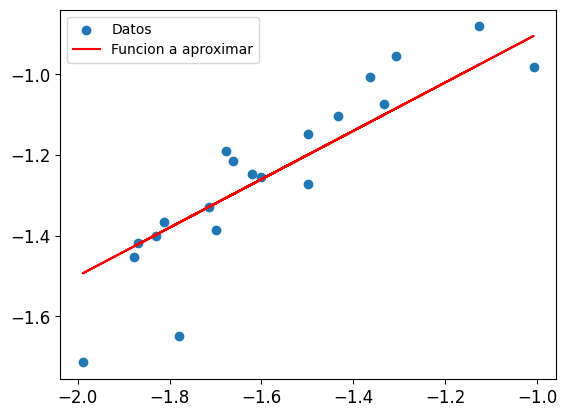

In [197]:
np.random.seed(60)
a0, a1 = -0.3, 0.6
var = 0.1
N = 20
x = -2.0 + np.random.rand(N)
f = a0+a1*x
t = a0+a1*x+var*np.random.randn(N)
plt.scatter(x,t,label='Datos')
plt.plot(x,f,color='red',label='Funcion a aproximar')
plt.legend(loc='upper left')

Como modelo usaremos una regresión lineal de la forma $y(x) = \omega_0 + \omega_1 x$. Escribamos para estos la matriz de diseño.
$$\Phi = \begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1)\\
\phi_0(x_2) & \phi_1(x_2)\\
\vdots & \vdots\\
\phi_0(x_N) & \phi_1(x_N)\\
\end{pmatrix}$$

In [199]:
model = LinearModelDegree(1)
Phi=model.Phi(x.reshape(-1,1))
print(Phi.shape)
print(Phi[0])

(20, 2)
[ 1.         -1.69912667]


Obtengamos el *estimador de máxima verosimilitud* dado por 
$$\begin{pmatrix}
\omega_0^\text{ML}\\
\omega_1^\text{ML}\\
\end{pmatrix} 
= \left(\Phi^T \Phi\right)^{-1}\Phi^T \,\vec{t}
$$
donde recordemos que $\vec{t} = \begin{pmatrix}t_1\\ \vdots \\ t_N\end{pmatrix}$ es el vector de los valores *target* medidos.

In [202]:
model.fit(x.reshape(-1,1),t.reshape(-1,1))
wML = model.wML[:,0]
print(wML.shape)

(2,)


In [203]:
wML

array([-0.0453789 ,  0.76126673])

Si ahora utilizamos un prior gaussiano de la forma $p(\vec{\omega}) = \mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$ (es decir que $p(\vec{\omega}) = p(\omega_0) \times p(\omega_1)$ con cada $p(\omega_i) = \mathcal{N} (\mu=0,\sigma = \gamma)$ ) podemos actualizar iterativamente nuestra distribucion. ¿Qué quiere decir esto?

Para $n=1,...,N$:

$$p_{n}(\vec{w})=\frac{p(t_{n}|x_{n},\vec{w},\gamma, \beta)p_{n-1}(\vec{w}|\gamma,\beta,t_{1,...,n-1},x_{1,...,n-1})}{p(t_{n}|x_{n},\vec{w},\gamma, \beta,t_{1,...,n-1},x_{1,...,n-1})}$$

Con $p_{0}(\vec{w})=\mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$. Es decir, el posterior para el dato $n-1$ se transforma en el prior para el dato $n$.

Calculemos la verosimilitud y el posterior al usar solo 1 punto, 2 puntos, 3 puntos y todo el conjunto de 100 puntos. Para cada uno de estos casos grafiquemos:

*   El prior en esa iteracion en el espacio ($w_0$,$w_1$)
*   La recta en el espacio (x,t) definida por los ($w_0$,$w_1$) que maximizan el prior junto con la verdadera recta definida por ($a_0$,$a_1$).
*   La verosimilitud en esa iteracion en el espacio ($w_0$,$w_1$)
*   El posterior en esa iteracion en el espacio ($w_0$,$w_1$)


Utilicemos un metodo numerico y comparemos con la formula analitica del posterior.
$$
\vec{\mu}_N = \beta {\bf S}_N \Phi^T \vec{t}\\
{\bf S}_N^{-1} = \gamma {\bf 1} + \beta \Phi^T \Phi
$$
donde $\beta$ es el parámetro de precisión del ruido gaussiano, que en nuestro caso es $\beta = (1/\sigma)^2 = (1/0.2)^2 = 25$. Para seleccionar la cantidad de puntos a considerar, podemos usar slicing en $\vec{t}$ ( ``t[:N_puntos]``) y en $\Phi$ (``Phi[:N_puntos,:]``).

(100, 50)


/tmp/ipykernel_5743/3734267414.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


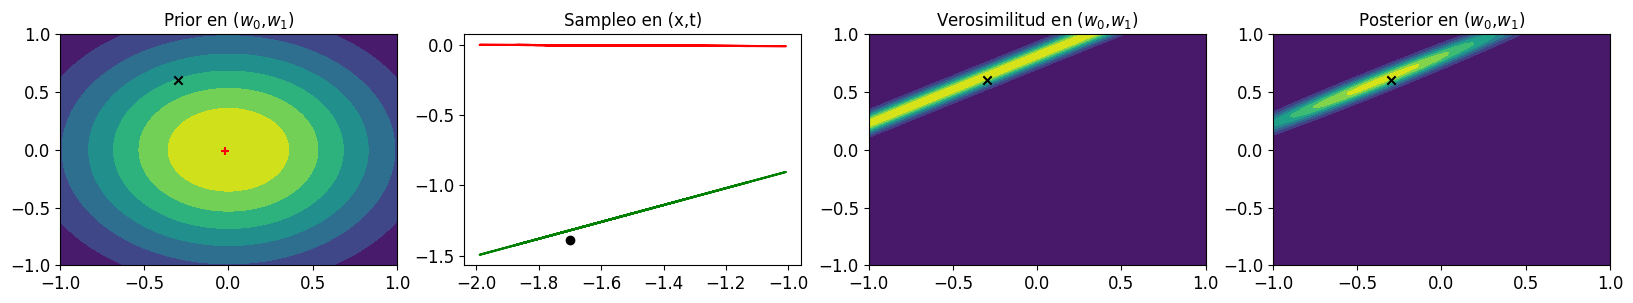

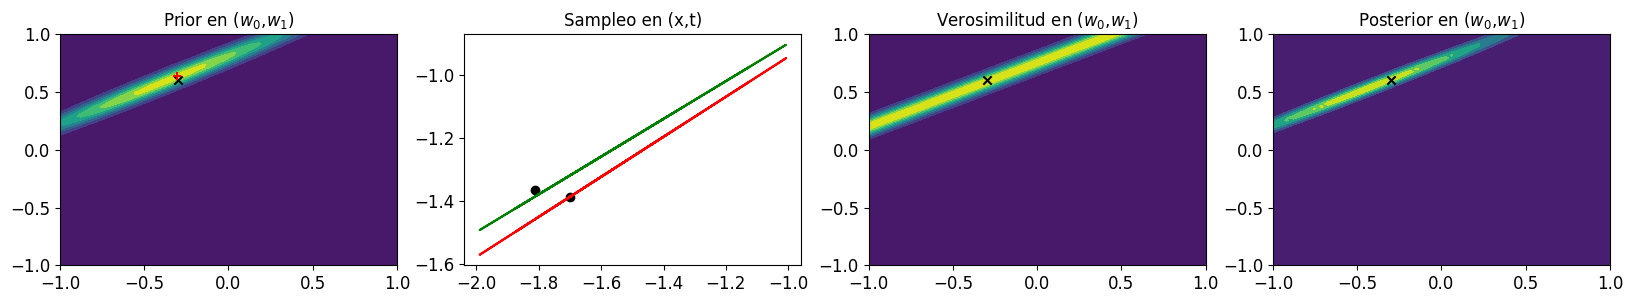

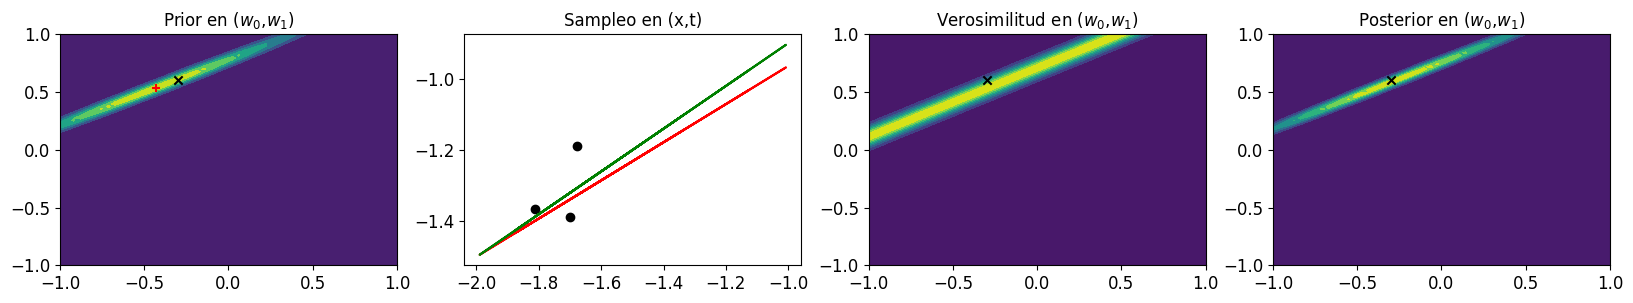

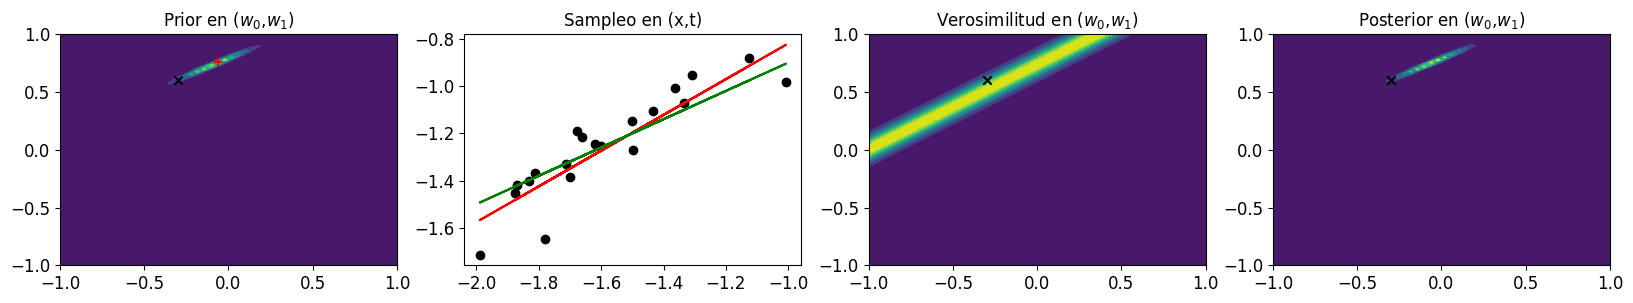

In [204]:
from scipy.stats import norm, multivariate_normal
gamma=0.5
# valores posibles
w0_values=np.linspace(-1.0,1.0,50)
w1_values=np.linspace(-1.0,1.0,100)
#para plottear
W0, W1 = np.meshgrid(w0_values,w1_values)
pos=np.dstack((W0,W1))
#definimos las listas vacias
prior=[]
verosimilitud=[]
posterior=[]

# para el dato 0:
prior.append(multivariate_normal(mean=[0.0,0.0],cov=gamma*np.eye(2)).pdf(pos))

print(prior[0].shape)

for i in range(len(x)):#loopeo sobre datos
  verosimilitud.append(norm(loc=W0+W1*x[i],scale=var).pdf(t[i]))#formula de la verosimilitud para el dato i
  evidencia = np.sum(verosimilitud[-1]*prior[-1])*(w1_values[1]-w1_values[0])*(w0_values[1]-w0_values[0])  #evidencia numerica para el dato 
  posterior.append(verosimilitud[-1]*prior[-1]/evidencia)#posterior normalizado para el dato 



# sampleo puntos de (w0,w1) maximos para prior. Utilicen np.where(a==np.max(a)) para encontrar los indices donde esta el maximo. Si hay varios maximos, quedense con el primero.

  sampleo_prior=[W0[np.where(prior[-1]==np.max(prior[-1]))][0],W1[np.where(prior[-1]==np.max(prior[-1]))][0]]

# grafico

  if(i==0 or i==1 or i==2 or i==len(x)-1):
    fig, axes = plt.subplots(1,4, figsize=(20,3))
    axes[0].contourf(W0,W1,prior[-1])
    axes[0].scatter(a0,a1,marker='x',color='black')
    axes[0].scatter(sampleo_prior[0],sampleo_prior[1],marker='+',color='red')
    axes[0].set_title('Prior en ($w_0$,$w_1$)')
    axes[1].scatter(x[:i+1],t[:i+1],color='black')
    axes[1].plot(x,sampleo_prior[0]+sampleo_prior[1]*x,color='red')
    axes[1].plot(x,a0+a1*x,color='green')
    axes[1].set_title('Sampleo en (x,t)')
    axes[2].contourf(W0,W1,verosimilitud[-1])
    axes[2].scatter(a0,a1,marker='x',color='black')
    axes[2].set_title('Verosimilitud en ($w_0$,$w_1$)')
    axes[3].contourf(W0,W1,posterior[-1])
    axes[3].scatter(a0,a1,marker='x',color='black')
    axes[3].set_title('Posterior en ($w_0$,$w_1$)')

    fig.show()

# actualizo el prior
  prior.append(posterior[-1])
  


In [205]:
W1[np.where(prior[-1]==np.max(prior[-1]))][0]

0.7777777777777779

#### Posterior predictiva

La posterior predictiva es la probabilidad de medir un nuevo valor $t'$ para un feature $x'$ dado que medimos los targets anteriores:

$$p(t'|x',X,T,\beta,\gamma)$$

Con nuestro modelado, podemos escribir esta probabilidad como:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t', \vec{w}|x',X,T,\beta,\gamma)$$

Utilizando las reglas de la probabilidad y el hecho de que si conozco $\vec{w}$ las mediciones son independientes, tengo:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t'|\vec{w},x',\beta)p(\vec{w}|X,T,\beta,\gamma)$$

¡Donde aparece nuestro posterior!

Veamos como funciona esto en la practica:

In [261]:

N_SAMPLES = 30
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2*np.pi*x) + np.random.randn(N_SAMPLES, 1) * 0.3

x_train, x_test = x[:int(0.75*N_SAMPLES)], x[int(0.75*N_SAMPLES):]
t_train, t_test = t[:int(0.75*N_SAMPLES)], t[int(0.75*N_SAMPLES):]

Obtengamos los parametros de la posterior

In [286]:
beta = 1/0.3
gamma = 1e-8 / 0.3 # gamma/beta = lambda 
mu0=0.0
M = 3

model=LinearModelDegree(degree=M)

Phi_train=model.Phi(x_train)
Phi_test=model.Phi(x_test)

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{1} &=& \left(\mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\right)\cdot \mathbf{S}_{N}\;\;.
\end{array}}
$$

In [287]:
SN=np.linalg.solve(gamma*np.eye(M+1)+beta*np.dot(Phi_train.T,Phi_train),np.eye(M+1))
muN=beta*np.dot(SN,np.dot(Phi_train.T,t_train))

In [288]:
print(np.linalg.inv(SN)/(len(x_train)*beta),np.mean(x_train),np.mean(x_train**2))## verficacion para M = 1

[[1.         0.53779803 0.36571786 0.27861833]
 [0.53779803 0.36571786 0.27861833 0.2269779 ]
 [0.36571786 0.27861833 0.2269779  0.19300353]
 [0.27861833 0.2269779  0.19300353 0.16883168]] 0.5377980264086912 0.3657178607880976


In [289]:
print(muN.shape,SN.shape)

(4, 1) (4, 4)


Teniendo la distribucion $p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$, podemos ahora tratar de hacer predicciones para una nueva medicion:

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)$$

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)=\int p(t_{N+1}|x_{N+1},\vec{w},\beta)p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})d^{M+1}w$$

Esta integral es, a simple vista, un poco aterradora. Veamos que podemos hacer al respecto


#### Predicciones semi-bayesianas

Podemos, antes que nada, aproximar $\vec{w}$ por el valor de Maximo A Posteriori

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{MAP}),\beta)$$

Debido a que la posterior es una Gaussiana, $\vec{w}_{MAP}=\vec{\mu}_{N}$


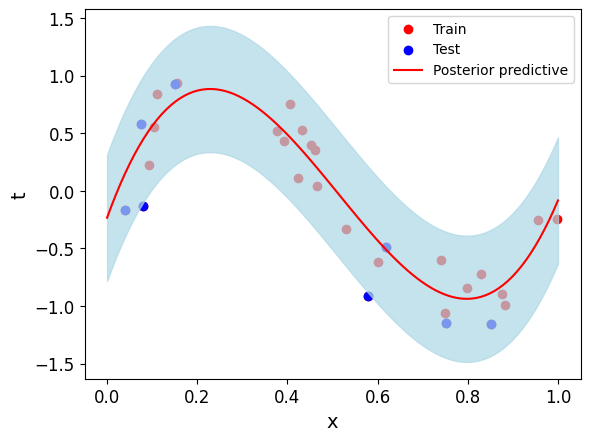

In [290]:
xx = np.linspace(0, 1, 100).reshape([-1, 1])

Phi_xx=model.Phi(xx)

tt=np.dot(Phi_xx,muN)

plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,tt,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), tt.flatten() + np.sqrt(1/beta), tt.flatten() - np.sqrt(1/beta), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

#### Funcion predictiva posterior

Para hacer la integral que ya mencionamos, podriamos ir directo al enfoque numerico. Para este tipo de problemas podemos recurrir a algo llamado Importance Sampling. Alli, sampleamos puntos utilizando la posterior

In [291]:
from scipy.stats import norm, multivariate_normal
Nsample=1000
w_sampled=multivariate_normal(mean=muN[:,0],cov=SN).rvs(Nsample)

Y utilizamos esos puntos sampleados para calcular

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{j}),\beta)$$

Entonces, podemos obtener el valor promedio de $t_{N+1}$ como

$$\mathbf{E}[t_{N+1}]\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\vec{w}_{j}^{T}\cdot \vec{\phi}(x_{N+1})=\frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mu_{j}$$

y la varianza viene dada por

$$\text{Var}[t_{N+1}]\approx \frac{1}{\beta}+\frac{1}{N_{\text{samples}}}(\sum_{j}\mu^{2}_{j}-\frac{1}{N_{\text{samples}}}(\sum_{l}\mu_{l})^{2})$$




In [292]:
mus=np.dot(w_sampled,Phi_xx.T)
print(mus.shape)
tt=np.mean(mus,axis=0)
print(tt.shape)

(1000, 100)
(100,)


In [293]:
sum_mu=np.sum(mus,axis=0)
sum_mu_sqr=np.sum(np.asarray([mus[:,i]*mus[:,i] for i in range(mus.shape[1])]).T,axis=0)
yerror=np.sqrt(1.0/beta+(1.0/Nsample)*(sum_mu_sqr-(1.0/Nsample)*sum_mu))

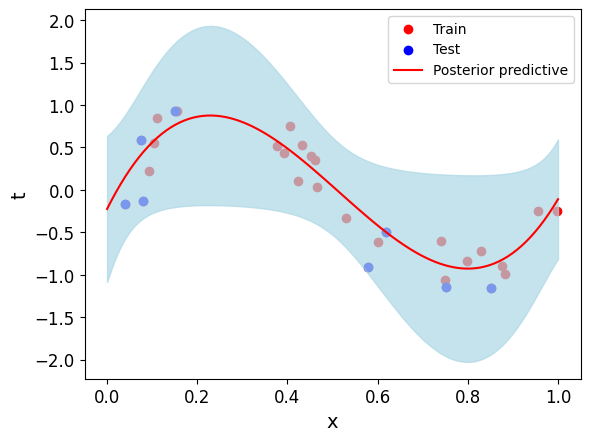

In [294]:
plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,tt,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), tt.flatten() + yerror.flatten(), tt.flatten() - yerror.flatten(), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Esto es util, si, pero no estamos aprovechando la belleza de usar priors conjugados. Todavia podemos resolver cosas analiticamente!

La posterior predictiva va a ser

$$
p(t_{N+1} | x_{N+1}, t_{1,...,N}, x_{1,...,N}, \gamma, \beta) = \mathcal{N}(t_{N+1} | \vec{\mu}_N^{T} \vec{\phi}(x_{N+1}), \sigma_N^2)\;\;,
$$

donde la varianza es
$$
\sigma_N^2 = \frac{1}{\beta} + \vec{\phi}(x_{N+1})^{T} \mathbf{S}_N \vec{\phi}(x_{N+1})\;\;,
$$
que consiste en una contribución debida a la incertidumbre en los parámetros, y otra que viene de la incerteza de los datos.

In [295]:
mupred=np.dot(muN.T,Phi_xx.T).T
aux=np.asarray(list(map(lambda i: np.dot(Phi_xx[i,:],np.dot(SN,Phi_xx[i,:])),range(Phi_xx.shape[0]))))
sigmapred=np.sqrt(1.0/beta+aux)

In [296]:
sigmapred.shape

(100,)

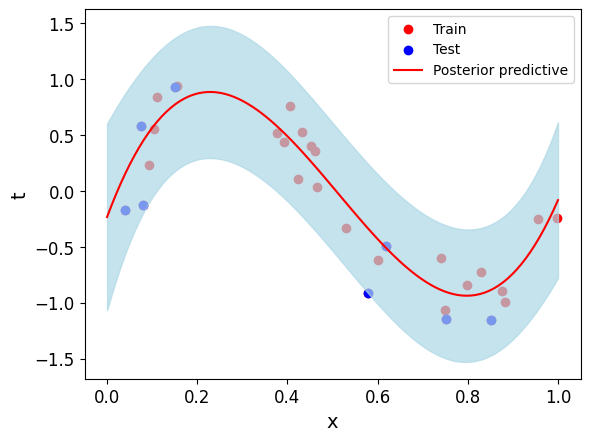

In [297]:


plt.scatter(x,t, c='red', label='Train')
plt.scatter(x_test,t_test, c='blue', label='Test')
plt.plot(xx,mupred,c='red',label='Posterior predictive')
plt.fill_between(xx.flatten(), mupred.flatten() + sigmapred.flatten(), mupred.flatten() - sigmapred.flatten(), color='LightBlue', alpha=0.7)
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

#### Ejercicio

Repitamos todo esto eligiendo unicamente 2 puntos al azar para entrenar el modelo. Que pasa?

## Classification

Estamos interesandos en problemas de clasificación en el que queremos aprender a asignar una clase $\mathcal{C}_{k}$ a un dato $x$ teniendo como datos de entrenamiento un conjunto etiquetado $x_{\text{train}},t_{\text{train}}$

La clase pasada vimos el **Perceptron**. Este clasificador nos provee una **función discriminante** $y(x,w)$ que separa a las clases. Es decir, $y$ tiene incluida una decisión sobre la clase a la que pertenece $x$.

Hoy vamos a ver un enfoque **discriminativo**. Nuestro modelo busca aprender

$$p(\mathcal{C}_{k}|x)$$

En este enfoque no intentamos modelar priors, verosimilitud y evidencia. Nos concentramos directamente en el **posterior**. Ahora, nuestra función $y(x,w)$ decide automaticamente la clase a la que pertenece $x$. Con el posterior a mano, tenemos que implementar la **teoría de la decisión** para asignar un valor de $t$.

Para el problema binario, sólo necesitamos modelar $p(\mathcal{C}_{1}|x)$ ya que $p(\mathcal{C}_{2}|x)=1-p(\mathcal{C}_{1}|x)$. Para el problema multiclase, si necesitamos modelar las $K$ distribuciones posteriores.

Para el caso binario, podemos hacer la siguiente cuenta

$$p(\mathcal{C}_{1}|x)=\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})+p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\frac{1}{1+\frac{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}}$$

Si tomamos $a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}$

$$p(\mathcal{C}_{1}|x)=\frac{1}{1+\text{e}^{-a}}=\sigma(a)$$

$\sigma(a)$ es la **función sigmoide**.

Si inspeccionamos $a$ un poco mas, vemos que 

$$a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\text{Ln }\frac{p(\mathcal{C}_{1}|x)}{p(\mathcal{C}_{2}|x)}$$

es el logaritmo del cociente entre probabilidades. Entonces, utilizando la sigmoide, podemos prescindir de la verosimilitud y del prior, considerando unicamente los posteriores.

Text(0.5, 0, 'Log odds')

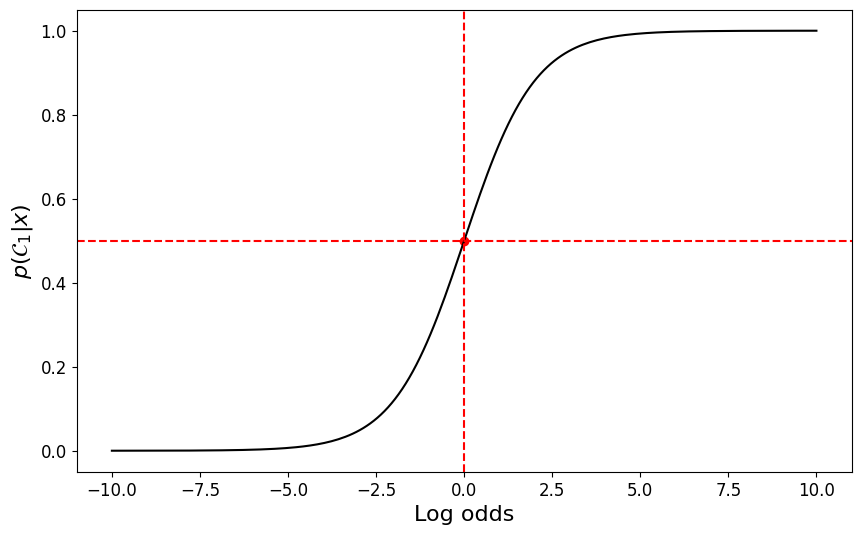

In [39]:
prob = np.linspace(-10, 10, 200)

a_vals = 1 / (1 + np.exp(-prob))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(prob, a_vals, color='black')
ax.scatter(0.0, 0.5, color='red')
ax.axvline(0.0, linestyle="dashed",color='red')
ax.axhline(0.5, linestyle="dashed",color='red')
ax.set_ylabel(r'$p(\mathcal{C}_{1}|x)$', fontsize=16)
ax.set_xlabel('Log odds', fontsize=16)

Vemos que si bien el cociente de probabilidades toma valores entre $-\infty$ y $\infty$, la función sigmoide tiene valores entre 0 y 1, que puede interpretarse como una probabilidad.

En particular, cuando el cociente de probabilidades da uno, la sigmoide da 0.5 (como tiene que dar!).

La sigmoide tiene dos propiedades útiles:

$$\sigma(-a)=1-\sigma(a)$$

y

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$


Para el caso de K clases, consideramos la siguiente generalización

$$p(\mathcal{C}_{k}|x)=\frac{p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})}{\sum_{l=1}^{K}p(x|\mathcal{C}_{l})p(\mathcal{C}_{l})}=\frac{e^{a_{k}}}{\sum_{l=1}^{K}e^{a_{l}}}$$

con $a_{k}=\text{Ln }p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})$

Esta función se conoce como la exponencial normalizada o **softmax**.


**Regresión Logística**

Vamos a considerar ahora la **Regresión Logística**. Para dos clases, modelamos el posterior como

$$p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$$

Fijense como, al igual que para el Perceptron, introducimos una función de activación no lineal. Sin embargo, esta función de activación es distinta y garantiza que obtengamos un número entre 0 y 1, tal como debe ser una probabilidad. Que utilicemos la sigmoide para lograrlo esta motivado en el truco que vimos en la sección anterior pero es ahora una elección de modelado, no un resultado de hacer inferencia.

Acá $\vec{\phi}$ vuelve a incluir $\phi_{0}(\vec{x})=1$.

Para muchos datos, agrupo

$$\Phi=\begin{pmatrix}\vec{\phi}^{T}(\vec{x}_{1}) \\ ... \\ \vec{\phi}^{T}(\vec{x}_{N})\end{pmatrix}$$

$\sigma(\Phi\cdot \vec{w}) = \begin{pmatrix}\sigma(\vec{\phi}^{T}(\vec{x}_{1}) \cdot\vec{w})\\ ... \\ \sigma(\vec{\phi}^{T}(\vec{x}_{N})\cdot\vec{w})\end{pmatrix}=\begin{pmatrix}\sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{1}))^T)\\ ... \\ \sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{N}))^T)\end{pmatrix}=\begin{pmatrix}y(\vec{x}_{1},\vec{w})\\ ... \\ y(\vec{x}_{N},\vec{w})\end{pmatrix}$

Necesitamos decidir la función de error adecuada para el problema y definir un algoritmo para minimizar dicha función.

Podemos encontrarla como hicimos para fundamentar cuadrados mínimos: escribiendo la verosimilitud.

$t$ es una variable binaria, con valores exito o fracaso. 
Para una única medición, la verosimilitud $p(\text{t}|\vec{x},\vec{w})$ es entonces una Bernoulli $p(t|\mu)=\mu^{t}(1-\mu)^{1-t}$ con $\mu$ la probabilidad de éxito. ¿Cuál es dicha probabilidad de éxito? Justamente es lo que queremos obtener, $p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})$.

Entonces para un dataset $\vec{x}_{n}$, con $n=1,..,N$ la verosimilitud es

$p(\text{T}|X,\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

donde $y_{n}=y(x_{n},\vec{w})$. Tomando el el logaritmo

$\text{Ln }p(\text{T}|\vec{w})=\sum_{n=1}^{N}(t_{n}\text{Ln }y_{n}+(1-t_{n})\text{Ln }(1-y_{n}))$

Aplicando un signo menos, llegamos a la función de error que nos interesa, y que vamos a usar muchisimo: la entropía cruzada o **cross-entropy**

$$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$$

Dado que $t_{n}=\{0,1\}$, la función de error hace lo siguiente

Si $t_{n}=1$, tiene en cuenta $\text{Ln }y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 1 para minimizar el error.

Si $t_{n}=0$, tiene en cuenta $\text{Ln }1-y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 0 para minimizar el error.

Es decir, hace lo que tiene que hacer. Recordemos que $y_{n}$ no es $t_{n}$ sino que es $p(t_{n}|\vec{x}_{n},\vec{w})$.

Minimizar esta función de error es más díficil que minimizar la de cuadrados mínimos debido a la presencia de los logaritmos. Sin embargo, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Este algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresión logística, uno puede llegar a sus propias ecuaciones normales _iterativas_ aprovechando las propiedades de la sigmoide

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de diseño, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia acá es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

Como mencionamos la clase pasada, y vamos a ver en detalle la clase que viene, necesitamos decidir cuando asignar una medición a una clase.

Para el caso binario, podemos tomar el criterio que $x\in\mathcal{C}_1$ si

$$p(\mathcal{C}_{1}|x)\geq p(\mathcal{C}_{2}|x)$$

Dado que tenemos probabilidades que suman uno, este criterio pone la **frontera de decisión** en

$$p(\mathcal{C}_{1}|x)=0.5$$

Puede mostrarse que esta elección de frontera de decisión maximiza la **exactitud** o **accuracy**

$$\text{Exactitud = }\frac{\text{VP}+\text{VN}}{\text{VP}+\text{FP}+\text{VN}+\text{FN}}$$

Es decir, minimizamos la cantidad de **errores totales** (que no es lo mismo que minimizar la entropía cruzada).



In [71]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-3, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


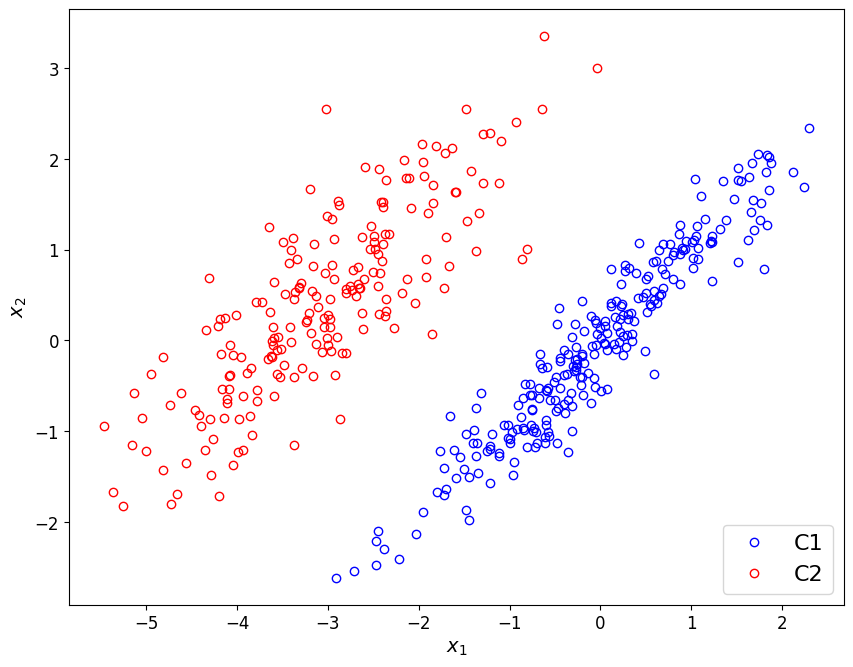

In [72]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [73]:
X = np.hstack([xc1, xc2]).T

tc1 = np.ones(xc1.shape[1])
tc2 = np.zeros(xc2.shape[1])

t = np.concatenate([tc1, tc2]).reshape(-1,1)

In [74]:
def sigmoid(logoddsvec):
    return 1/(1+np.exp(-logoddsvec))

In [75]:
Phi=np.hstack([np.ones(len(X)).reshape(-1,1), X])# matriz de diseño
#print(Phi.shape)
w=[np.ones(3).reshape(-1,1)]#inicializo los pesos
n_iter = 13 #defino el numero de iteraciones con el que voy a jugar
for i in range(n_iter):
  # obtengo los ys iniciales utilizando mis pesos, la matriz de diseño y la funcion de activacion
  y = sigmoid(np.dot(Phi, w[-1]))
  #print(y.shape)
  #R=np.diag(list(map(lambda yy: yy*(1-yy), y[:,0])))#matriz R
  R = np.diag(y[:,0]*(1-y[:,0]))#matriz R
  #print(R.shape)
  aux_matrix = np.linalg.solve(R,(y-t)) #paso auxiliar necesario
  z = np.dot(Phi,w[-1])-aux_matrix #matriz z
  aux_matrix_2 = np.dot(np.dot(Phi.T,R),Phi)
  aux_matrix_3 = np.dot(np.dot(Phi.T,R),z)
  w_aux=np.linalg.solve(aux_matrix_2,aux_matrix_3)
  if(1==1):#criterio de convergencia
    w.append(w_aux)
  else:
    break

Veamos como evolucionan los coeficientes

In [76]:
for w_val in w:
  print(w_val[:,0])

[1. 1. 1.]
[ 2.4404682   1.26402509 -1.91375055]
[ 3.45644332  1.96420953 -2.39061501]
[ 4.46892371  2.6750064  -3.00473299]
[ 5.50669428  3.44641528 -3.73743344]
[ 6.61784433  4.32475323 -4.6323189 ]
[ 7.88477088  5.36036928 -5.7345491 ]
[ 9.37809813  6.57649456 -7.04746665]
[11.11205601  7.95937618 -8.54144841]
[ 13.0623738    9.48246387 -10.18259107]
[ 15.18849171  11.11782682 -11.93793296]
[ 17.44722581  12.83904863 -13.7777448 ]
[ 19.80222713  14.62424842 -15.67896909]
[ 22.22681816  16.4571953  -17.6254591 ]


In [77]:
W = w[-1]
y = sigmoid(np.dot(Phi,W))

# Clasifico como 1 los casos que tienen P(c1 | x) >= 0.5
y_pred = np.where(y>=0.5, 1, 0)


In [78]:
TP = np.sum(t[np.where(y_pred[:,0]==1), 0])
FP = np.sum(1-t[np.where(y_pred[:,0]==1), 0])
TN = np.sum(1-t[np.where(y_pred[:,0]==0), 0])
FN = np.sum(t[np.where(y_pred[:,0]==0), 0])

print(TP, FP, TN, FN)
print((VP+VN)/(VP+FP+VN+FN))

250.0 0.0 200.0 0.0
1.0


In [79]:
def accuracy_score(labels,predictions):
    return np.mean(np.allclose(labels,predictions))

In [80]:
accuracy_score(t,y_pred)

np.float64(1.0)

Otra herramienta invaluable, y que vamos a explorar la clase que viene, es la matriz de confusión. Esta matriz tiene como elemento i-j la cantidad de elementos de la clase i asignados al grupo j.

In [81]:
def confusion_matrix(labels,predictions):
    #  pred0 pred1
    #verdad0  VN  FP
    #verdad1  FN  VP
    TP = np.sum(labels[np.where(predictions[:,0]==1), 0])
    FP = np.sum(1-labels[np.where(predictions[:,0]==1), 0])
    TN = np.sum(1-labels[np.where(predictions[:,0]==0), 0])
    FN = np.sum(labels[np.where(predictions[:,0]==0), 0])
    return np.array([[TN,FP],[FN,TP]])

In [83]:
cf = confusion_matrix(t,y_pred)
print(cf)

[[200.   0.]
 [  0. 250.]]


In [84]:
TN,FP,FN,TP = cf.ravel() 
print(TP,FP,TN,FN)

250.0 0.0 200.0 0.0


Y grafiquemos el resultado junto con la frontera de decisión que maximiza la exactitud

In [85]:
x1 = np.linspace(-6.0,3.0,3)
x2 = np.linspace(-3.0,4.0,2)
X1toplot, X2toplot = np.meshgrid(x1,x2)

#print(x1,x2)
print(X1toplot)
print(X2toplot)
#print(np.c_[X1toplot.ravel(), X2toplot.ravel()])

[[-6.  -1.5  3. ]
 [-6.  -1.5  3. ]]
[[-3. -3. -3.]
 [ 4.  4.  4.]]


/tmp/ipykernel_94519/1656797914.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))


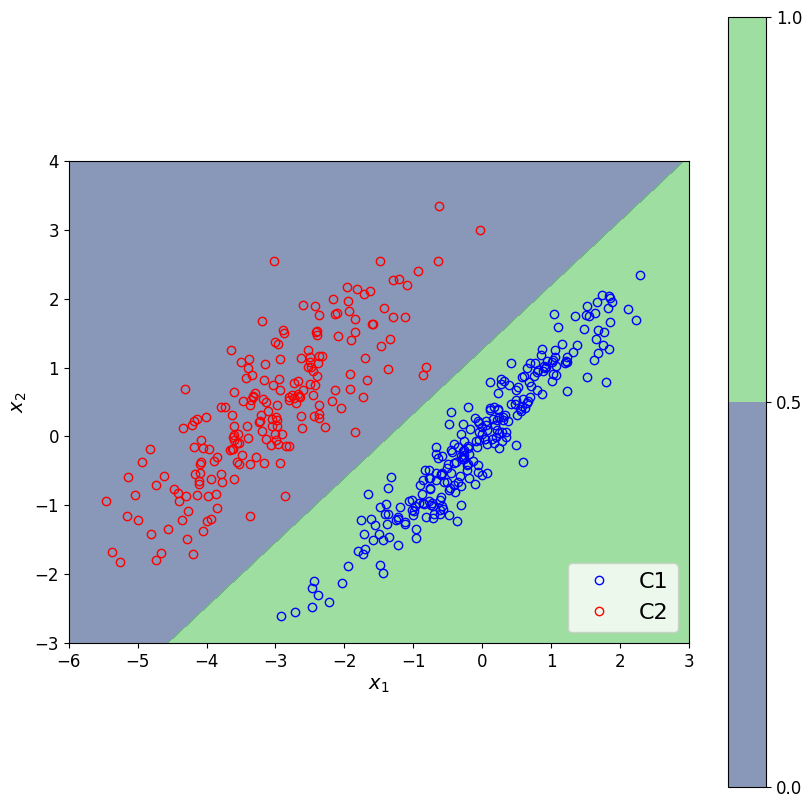

In [87]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)

#X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
#Z=(np.asarray([expit(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

Z = np.zeros((len(x2),len(x1)))
for x2_ind, x2_val in enumerate(x2):
  for x1_ind, x1_val in enumerate(x1):
    Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(x1,x2,Z,levels=[0.0,0.5,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

En este codigo, podemos agregar más valores a los níveles del gráfico para tener una idea de la forma del posterior.

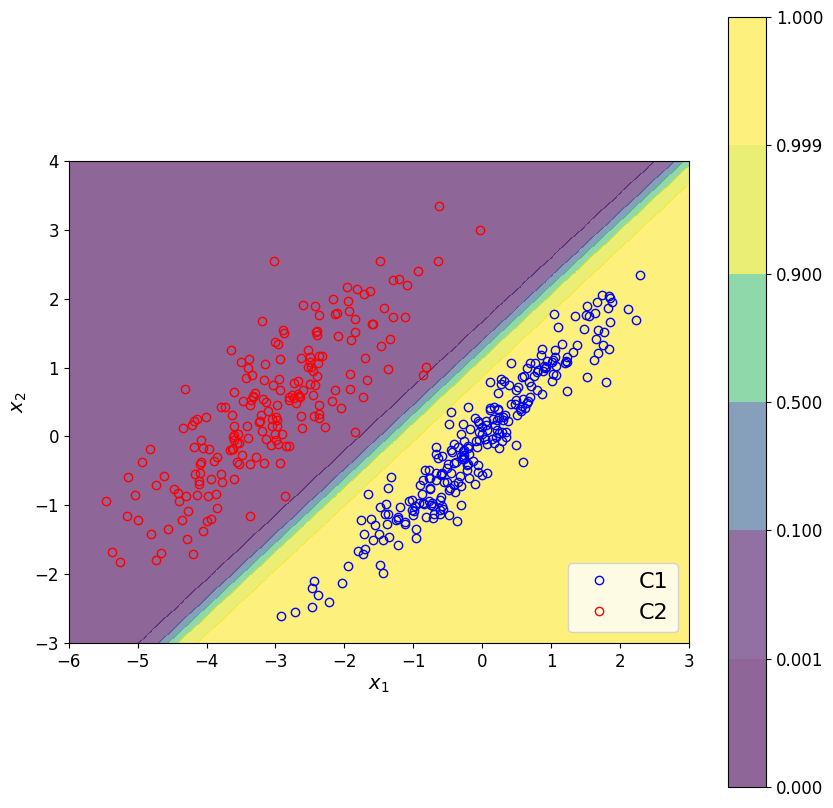

In [89]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)
X1toplot, X2toplot = np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([sigmoid(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.001,0.1,0.5,0.9,0.999,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [ ]:
class LogisticRegression:

    def init

    def fit:
        
    def predict:
        return 
    def predict_proba:
        return 

### Caso no linealmente separable

In [91]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-1.5, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


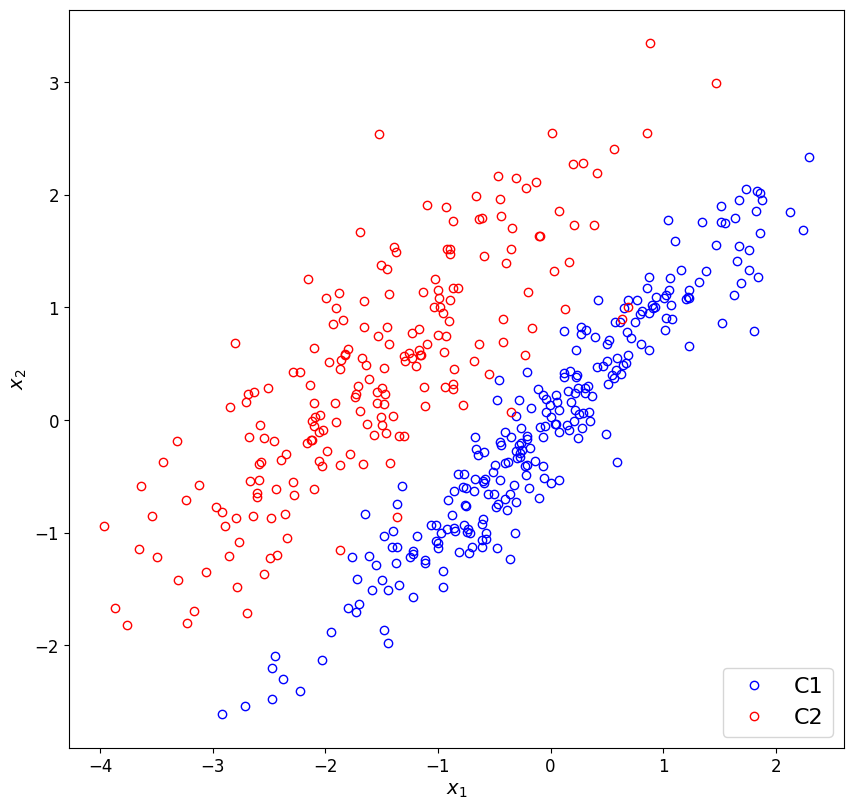

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

### Multiclass (`sklearn`-based)

A lo largo de las últimas clases, nos encontramos varias veces con que hay ciertas ambigüedades al pasar de 2 clases a K clases, con K mayor que 2. Repasemos entonces un poco las diferencias entre el caso binario y el caso multiclase y veamos que podemos hacer al respecto.

Vayamos primero al caso binario:
- Tenemos las etiquetas, que pueden venir de varias formas: {0,1},{-1,1},{[1,0],[0,1]}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Para el caso binario, sólo necesito 1 número para asignar la clase. Este número puede ser una función discriminante $y$ (por ejemplo el Perceptron o el SVC) o una probabilidad $p(C_{1}|x)$ (Regresión Logística, Naive Bayes). Noten que sólo necesitamos $p(C_{1}|x)$ porque, al tener únicamente dos clases, $p(C_{2}|x)=1-p(C_{1}|x)$.
- Para el caso binario necesitamos entonces aprender **una sola función**. Aparece entonces la frontera de decisión

Ejemplifiquemos con un caso de juguete:

In [2]:
from sklearn.datasets import make_blobs

gt_center = np.array([[2.0, 2.0],[-2.0, -2.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.5, random_state=1234, )

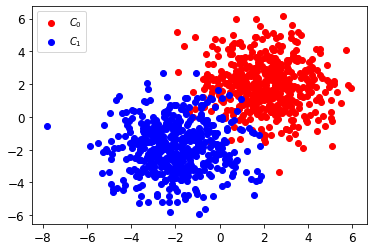

In [3]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [4]:
from sklearn.linear_model import LogisticRegression, Perceptron
lr = LogisticRegression()
percep = Perceptron()

In [5]:
lr.fit(X,t)
percep.fit(X,t)

Perceptron()

Para el caso del Perceptron, tendremos una única función de decisión. El criterio usual es que si $y\geq0$, asigno a la clase $C_{1}$. Esto se puede modificar tal como vimos antes.

In [7]:
print(percep.decision_function(X[:1]))

[4.95109495]


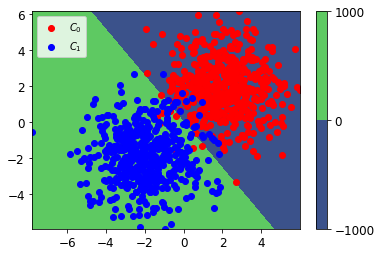

In [8]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = percep.decision_function(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[-1000,0.0,1000])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos dos probabilidades que suman uno, por lo que puedo quedarme únicamente con la segunda columna. El criterio por defecto es poner el umbral en $p(C_{1}|x)\geq 0.5$.

In [9]:
print(lr.predict_proba(X[:1]))

[[0.06538928 0.93461072]]


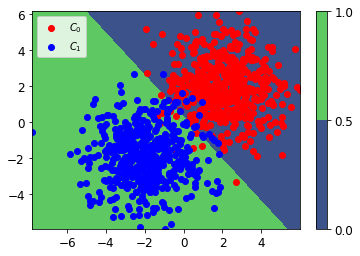

In [10]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lr.predict_proba(Xvals)[:,1].reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[0.0,0.5,1.0])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Vayamos ahora al caso multiclase:
- Tenemos las etiquetas, que pueden venir esencialmente en dos formas: {0,1,...,K-1},{[1,0,...,0],[0,1,0,...,0],...}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Acá es donde aparece la gran diferencia. ¿Qué entrenamos? 
- El primer enfoque es el de _uno contra el resto_. Para cada clase $K$, entreno un clasificador que aprenda a distinguir esa clase del resto. Tenemos entonces K clasificadores. Por ejemplo, para 4 clases: (0,123), (1,023), (2,013), (3,012). Uno asigna entonces una clase viendo como se intersectan las distintas regiones de los clasificadores. Eso introduce la posibilidad de regiones ambiguas. Además, el problema se puede volver muy desbalanceado. 
- El segundo enfoque es el de _uno contra uno_. En este enfoque, entreno un clasificador para cada combinación de dos clases. Tenemos entonces $\frac{K(K-1)}{2}$ clasificadores, uno por cada problema de dos clases. Por ejemplo, para 4 clases: (0,1), (0,2), (0,3), (1,2), (1,3), (2,3). Para asignar una clase, tomamos entonces el voto mayoritario. Es decir, cual es la clase que recibe más votos de cada uno de estos clasificadores. Esto también introduce ambigüedades.
- El tercer enfoque, que no asigna ambiguedades. Es aprender un único clasificador de $K$ clases. Para el caso de función discriminante, esto se logra aprendiendo K funciones $y_{k}$ al mismo tiempo, y asignando la clase como la que da el maximo $y_{k}$ entre todos. Las fronteras de decisión son entonces dadas por las regiones donde coinciden dos funciones. Se puede mostrar que con este criterio ya no hay ambigüedades. Para el caso de modelos discriminativos y generativos, esto es todavia más fácil. ¡Aprendemos $p(C_{k}|x)$ tal como antes! Ahora simplemente no simplificamos la clase redundante. Tampoco hay ambigüedades.

Cual de los tres enfoques usamos depende del algoritmo. En particular, hay algunos que no pueden utilizar el tercer enfoque y entonces aparece el problema. Noten que ahora escribi el criterio, mientras que antes siempre aclare que podiamos jugar con el umbral. Para el caso multiclase, el análisis que hicimos se vuelve más díficil. Para poder hacerlo, vamos a binarizar el problema.

Ejemplifiquemos con un caso de juguete:

In [11]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

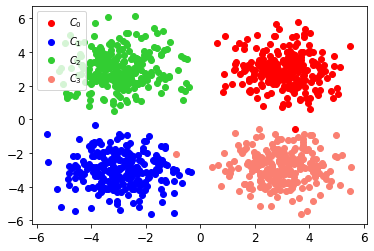

In [12]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis(solver='lsqr')

In [14]:
lr.fit(X,t)
lda.fit(X,t)

LinearDiscriminantAnalysis(solver='lsqr')

Para el caso del LinearDiscriminantAnalysis, tendremos ahora cuatro funciones de decisión. 

In [15]:
print(lda.decision_function(X[:1]))

[[ -3.13427549 -18.79619805  -8.21778037 -11.90111461]]


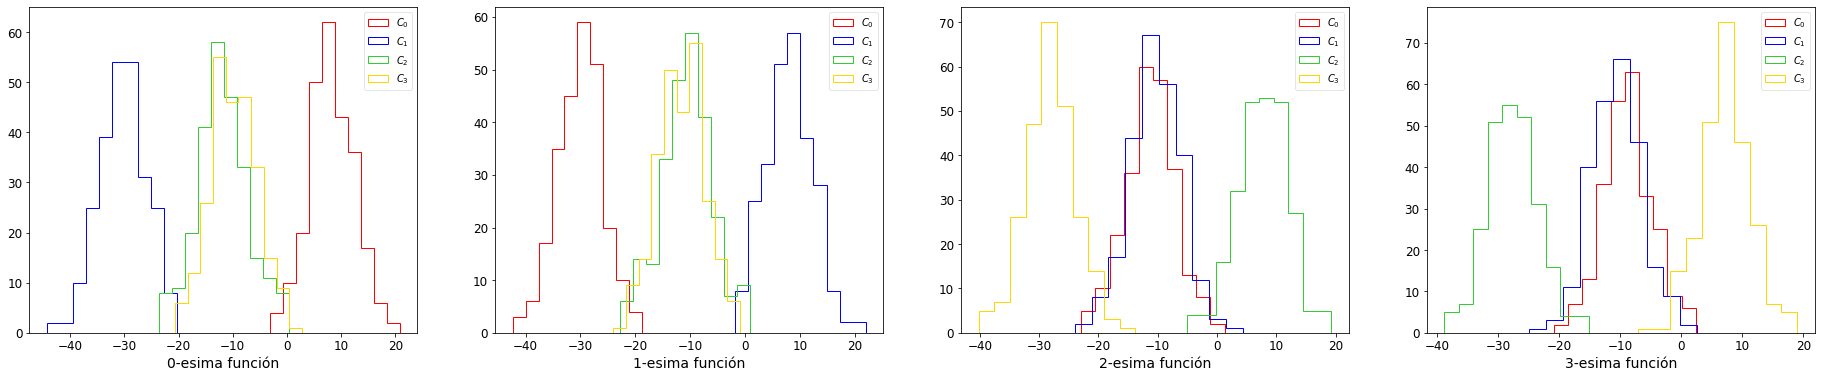

In [16]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lda.decision_function(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lda.decision_function(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lda.decision_function(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lda.decision_function(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima función')
    ax[k].legend(loc='upper right',framealpha=0.5)

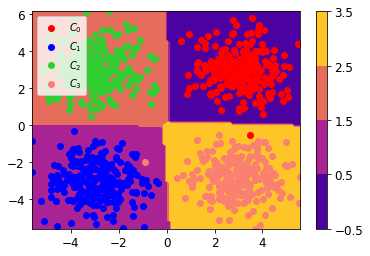

In [17]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lda.decision_function(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos cuatro probabilidades que suman uno.

In [21]:
print(lr.predict_proba(X[:1]))

[[8.75343203e-01 9.87611271e-05 1.09991086e-01 1.45669498e-02]]


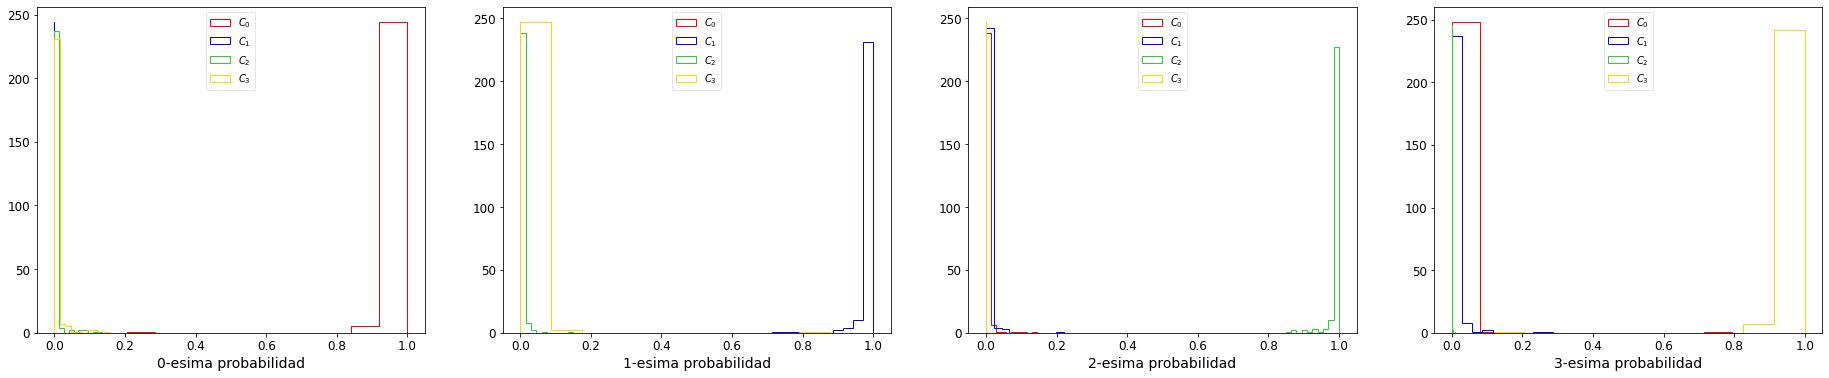

In [23]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lr.predict_proba(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lr.predict_proba(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lr.predict_proba(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lr.predict_proba(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima probabilidad')
    ax[k].legend(loc='upper center',framealpha=0.5)

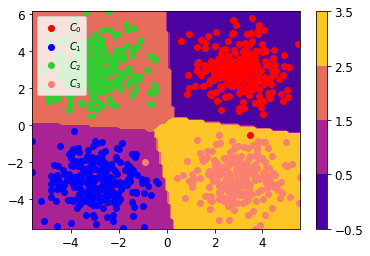

In [24]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lr.predict_proba(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

En general, vamos a utilizar algoritmos que tengan el tercer enfoque para el problema multiclase. En ese caso, nos quedamos tranquilos de que tenemos una asignación clara basada en el criterio de maximización de función discrimiante / probabilidad posterior. Podemos construir las matriz de confusión y calcular la accuracy:

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(t,lr.predict(X)))
print(accuracy_score(t,lr.predict(X)))

[[249   0   0   1]
 [  0 250   0   0]
 [  0   0 250   0]
 [  0   1   0 249]]
0.998


Si queremos ver otras métricas nos encontramos con que están diseñadas para el caso binario. Una posibilidad es binarizar de antemano y entrenar un clasificador binario en efecto reduciendo el problema a alguno de los otros dos enfoques (como hicimos el Martes pasado!). Otra es aprovechar este clasificador entrenado a full y tomar simplemente distintos positivos y negativos. El gran problema viene si queremos mover el umbral. Las asignaciones se toman en cuenta tomando el máximo, por lo que el valor relativo es importante, no el absoluto. Eso conspira para que el analogo a mover el umbral en el caso binario no sea trivial.

In [28]:
from sklearn.metrics import precision_score, f1_score
for k in range(4):
    print('Clase '+str(k)+' contra todos')
    print(f1_score(np.where(t==k,1.0,0.0),np.where(lr.predict(X)==k,1.0,0.0)))

Clase 0 contra todos
0.9979959919839679
Clase 1 contra todos
0.998003992015968
Clase 2 contra todos
1.0
Clase 3 contra todos
0.996


Sin embargo, hay algoritmos que, en `sklearn`, no tienen incorporado este tercer criterio. Por ejemplo, el `Perceptron`, utiliza el _Uno contra todos_.

La clase pasada vimos las SVM. Para este algoritmo tampoco puede utilizarse fácilmente el buen enfoque ya que esta muy pensado para el caso binario. SVC tiene que elegir entonces entre los dos enfoques imperfectos. Por lo tanto, hace lo siguiente:
- `LinearSVC` resuelve el problema usando _uno contra todos_.  Se puede utilizar tambien el criterio `crammer_singer` que es parecido al tercer enfoque.
- `SVC` resuelve el problema usando _uno contra uno_. Sin embargo, y por compatibilidad, reporta la función de decisión como _uno contra todos_. Uno puede transformarla la función de decisión a _uno contra uno_ sin prolbema.

In [29]:
from sklearn.svm import LinearSVC, SVC
lsvc_1 = LinearSVC(loss='hinge', penalty='l2',C=10.0,max_iter=1000)
svc_1 = SVC(kernel='linear', C=10.0,decision_function_shape='ovr')
svc_2 = SVC(kernel='linear', C=10.0,decision_function_shape='ovo')

In [30]:
lsvc_1.fit(X,t)
svc_1.fit(X,t)
svc_2.fit(X,t)

/home/manuel/jupyter/jupyterenvironment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC(C=10.0, decision_function_shape='ovo', kernel='linear')

In [34]:
print(lsvc_1.decision_function(X[:1]).shape)
print(svc_1.decision_function(X[:1]).shape)
print(svc_2.decision_function(X[:1]).shape)

(1, 4)
(1, 4)
(1, 6)


Como estoy con `kernel=linear` puedo ver los coeficientes.

In [35]:
print(lsvc_1.coef_.shape) # (nclasses, ncoefs)
print(svc_1.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)
print(svc_2.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)

(4, 2)
(6, 2)
(6, 2)


En efecto, la forma de la función de decisión no cambia como aprende. Eso es siempre 'ovo'. El orden es de 0 a K-1 con “0 vs 1”, “0 vs 2” , … “0 vs K-1”, “1 vs 2”, “1 vs 3”, “1 vs K-1”, . . . “K-2 vs K-1”

In [196]:
print(np.allclose(svc_1.coef_,svc_2.coef_)) 

True


In [187]:
print(lsvc_1.decision_function(X[:1]),len(lsvc_1.decision_function(X[:1])[0]))
print(lsvc_1.predict(X[:1]))
print(svc_1.decision_function(X[:1]),len(svc_1.decision_function(X[:1])[0]))
print(svc_1.predict(X[:1]))
print(svc_2.decision_function(X[:1]),len(svc_2.decision_function(X[:1])[0]))
print(svc_2.predict(X[:1]))

[[ -1.76942724 -11.6022257   -3.53458947  -5.49358822]] 4
[0]
[[ 3.26875807 -0.31485508  2.28228002  1.29340438]] 4
[0]
[[  1.00000237   0.99979827   2.16213468  -5.73964319 -10.29957355
    0.78927807]] 6
[0]


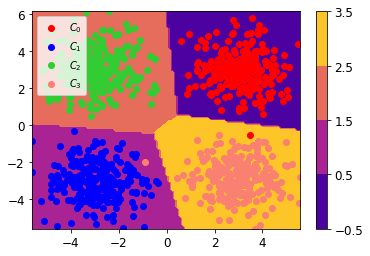

In [36]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lsvc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

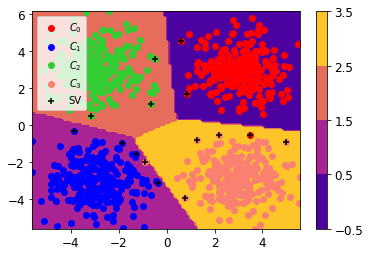

In [241]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_1.support_vectors_[:,0],svc_1.support_vectors_[:,1],marker='+',color='black',label='SV')
plt.legend(loc='upper left')

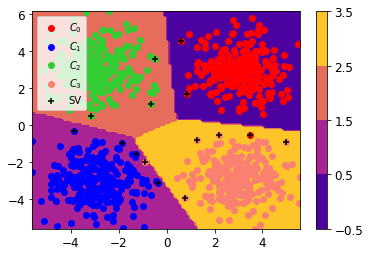

In [38]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_2.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_2.support_vectors_[:,0],svc_2.support_vectors_[:,1],marker='+',color='black',label='SV')

plt.legend(loc='upper left')

## Clustering

In [4]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

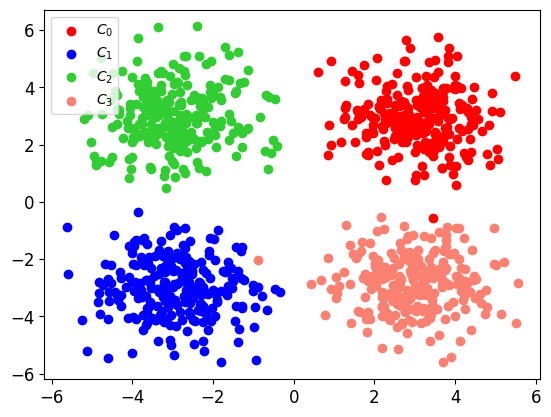

In [5]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

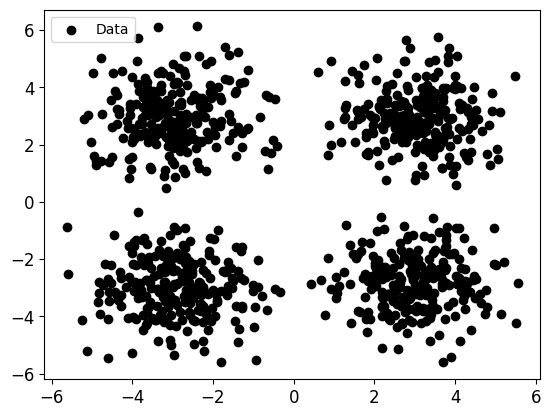

In [6]:

plt.scatter(X[:,0],X[:,1],c='black', label='Data')

plt.legend(loc='upper left')

In [60]:
class KMeansClustering():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)

    def fit(self,X,nepochs=10,min_change=0.01):
        for nepoch in range(nepochs):
            indexes = self.class_assigner(X)
            for nclass in range(self.nclasses):
                self.means[nclass] = np.sum(X[indexes==nclass],0)/np.sum(indexes==nclass)
        return self

    def class_assigner(self,X):
        distances = np.sum((X[:,np.newaxis]-self.means[np.newaxis])**2,2) 
        indexes=np.argmin(distances,1)
        return indexes

In [67]:
clusterer = KMeansClustering(nclasses=4,seed=42)
clusterer.fit(X)
labels = clusterer.class_assigner(X)

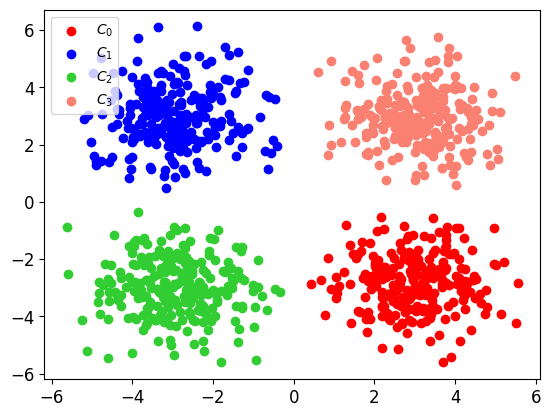

In [68]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

#### Jet Clustering

## Density Estimation

Gaussian mixture

In [ ]:
class GaussianMixtureModel():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)
        # self.covs = mean_init+scale_init*np.random.randn(nclasses,ndim)

    def fit(self,X,nepochs=10,min_change=0.01):
        for nepoch in range(nepochs):
            indexes = self.class_assigner(X)
            for nclass in range(self.nclasses):
                self.means[nclass] = np.sum(X[indexes==nclass],0)/np.sum(indexes==nclass)
        return self

    def class_assigner(self,X):
        distances = np.sum((X[:,np.newaxis]-self.means[np.newaxis])**2,2) 
        indexes=np.argmin(distances,1)
        return indexes
        
def E_step():
    return

def M_step():
    return

def log_likelihood():
    return